## EDA

In [1]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

X_train_2 = pd.read_csv("train_2.csv", sep = ",")
X_test_2 = pd.read_csv("test_2.csv", sep = ",")

# y_train = pd.read_csv("y_train.csv", sep = ";")
# y_test = pd.read_csv("y_test.csv", sep = ";")

X_train_2.head()

,Unnamed: 0,GR,RFV,H1RFV,H2RFV,CONICITY,H1LFV,PLY,LFV,RRO,CAPSPLICE,H1RRO,Y
0,2,A,46,14,23,4.5,4.3,56.0,13.0,0.77,0.17,0.17,0
1,3,A,35,19,6,6.4,13.7,52.8,16.7,0.60,0.26,0.19,0
2,4,A,34,12,2,8.0,4.8,49.5,11.5,0.50,0.33,0.20,0
3,6,A,39,16,22,9.4,5.1,52.3,9.3,0.51,0.28,0.15,0
4,7,C,55,27,35,12.1,9.0,51.3,14.7,0.79,0.20,0.40,1


In [3]:
y_train = X_train_2[['Y']]
y_test = X_test_2[['Y']]

X_train = X_train_2[['RFV','H2RFV','CONICITY',
        'PLY','LFV','RRO', 'CAPSPLICE']]

X_test = X_test_2[['RFV','H2RFV','CONICITY',
       'PLY','LFV','RRO', 'CAPSPLICE']]

In [4]:
X_train.describe()

,RFV,H2RFV,CONICITY,PLY,LFV,RRO,CAPSPLICE
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,57.469136,19.506173,8.869136,50.674074,12.556790,0.832346,0.306296
std,16.511425,9.268392,2.021116,2.831288,3.020304,0.248099,0.120067
min,31.000000,2.000000,4.500000,40.400000,7.000000,0.420000,0.150000
25%,45.000000,13.000000,7.200000,49.500000,10.600000,0.650000,0.230000
50%,56.000000,19.000000,8.600000,50.800000,12.000000,0.800000,0.270000
75%,68.000000,24.000000,10.400000,52.300000,14.700000,1.000000,0.330000
max,101.000000,46.000000,13.200000,56.500000,20.900000,1.480000,0.750000


In [5]:
data = X_train.copy()
data['Y'] = y_train
data.head(2)

,RFV,H2RFV,CONICITY,PLY,LFV,RRO,CAPSPLICE,Y
0,46,23,4.5,56.0,13.0,0.77,0.17,0
1,35,6,6.4,52.8,16.7,0.60,0.26,0


In [21]:
data.groupby("Y").describe()['LFV']

,count,mean,std,min,25%,50%,75%,max
Y,,,,,,,,
0,36.0,12.577778,2.917446,8.3,10.55,12.2,14.825,19.0
1,45.0,12.540000,3.132847,7.0,10.70,11.9,14.700,20.9


<AxesSubplot:ylabel='Y'>

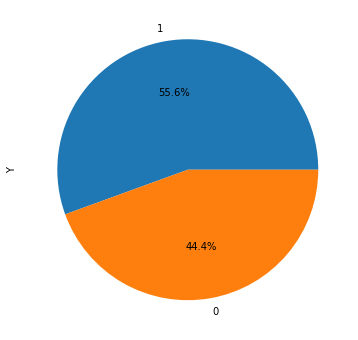

In [7]:
plt.figure(figsize=(6,6))
data['Y'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:xlabel='RFV', ylabel='Count'>

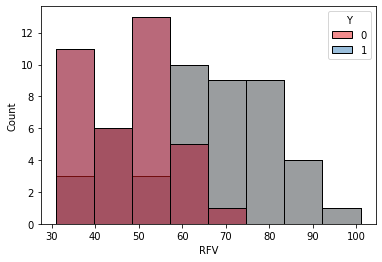

In [10]:
import seaborn as sns

# Histograma
sns.histplot(x = data["RFV"], hue = data["Y"])

# Equivalente a:
sns.histplot(x = "RFV", hue = "Y", data = data, palette = "Set1")

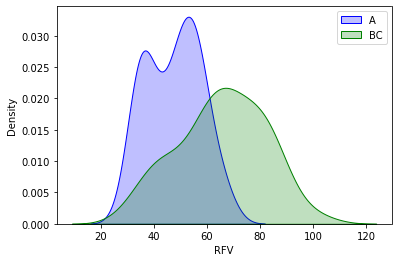

In [8]:
g = sns.kdeplot(data["RFV"][(data["Y"] == 0) & (data["RFV"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["RFV"][(data["Y"] == 1) & (data["RFV"].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel("RFV")
g.set_ylabel("Density")
g = g.legend(["A","BC"])

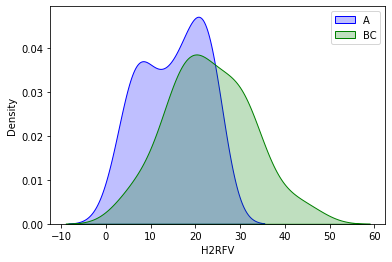

In [9]:
g = sns.kdeplot(data["H2RFV"][(data["Y"] == 0) & (data["H2RFV"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["H2RFV"][(data["Y"] == 1) & (data["H2RFV"].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel("H2RFV")
g.set_ylabel("Density")
g = g.legend(["A","BC"])

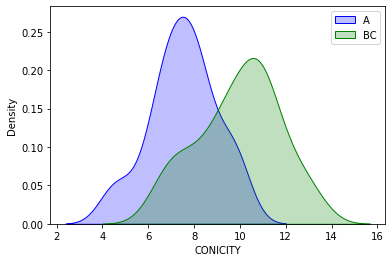

In [10]:
g = sns.kdeplot(data["CONICITY"][(data["Y"] == 0) & (data["CONICITY"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["CONICITY"][(data["Y"] == 1) & (data["CONICITY"].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel("CONICITY")
g.set_ylabel("Density")
g = g.legend(["A","BC"])

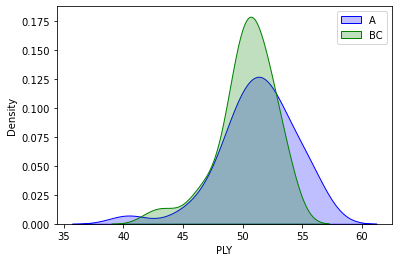

In [11]:
g = sns.kdeplot(data["PLY"][(data["Y"] == 0) & (data["PLY"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["PLY"][(data["Y"] == 1) & (data["PLY"].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel("PLY")
g.set_ylabel("Density")
g = g.legend(["A","BC"])

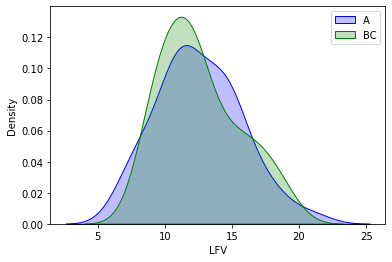

In [12]:
g = sns.kdeplot(data["LFV"][(data["Y"] == 1) & (data["LFV"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["LFV"][(data["Y"] == 0) & (data["LFV"].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel("LFV")
g.set_ylabel("Density")
g = g.legend(["A","BC"])

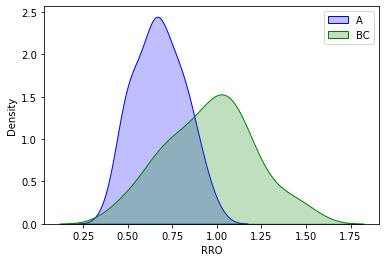

In [13]:
g = sns.kdeplot(data["RRO"][(data["Y"] == 0) & (data["RRO"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["RRO"][(data["Y"] == 1) & (data["RRO"].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel("RRO")
g.set_ylabel("Density")
g = g.legend(["A","BC"])

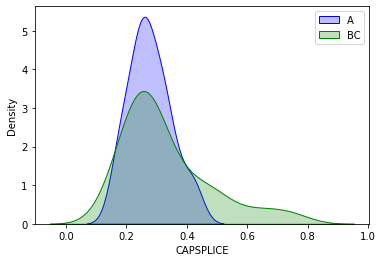

In [14]:
g = sns.kdeplot(data["CAPSPLICE"][(data["Y"] == 0) & (data["CAPSPLICE"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["CAPSPLICE"][(data["Y"] == 1) & (data["CAPSPLICE"].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel("CAPSPLICE")
g.set_ylabel("Density")
g = g.legend(["A","BC"])

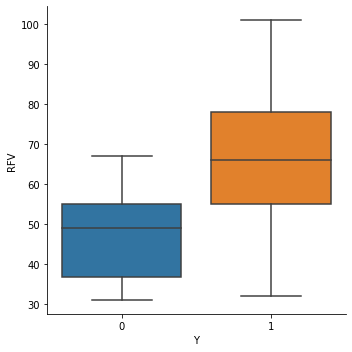

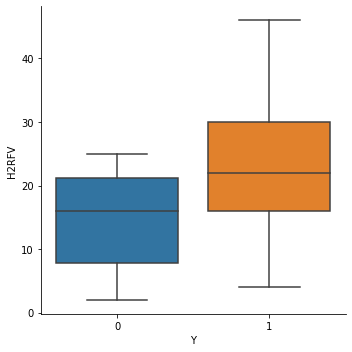

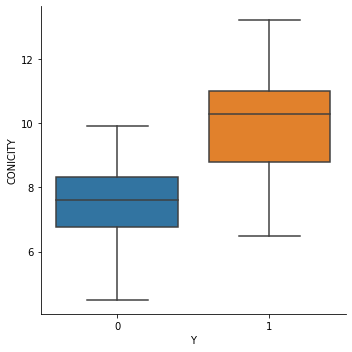

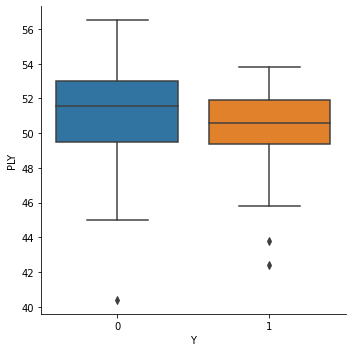

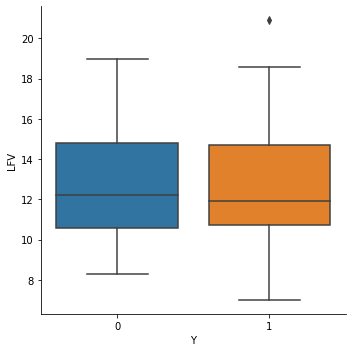

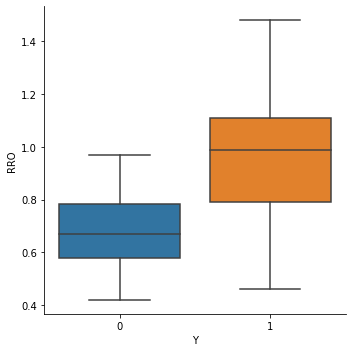

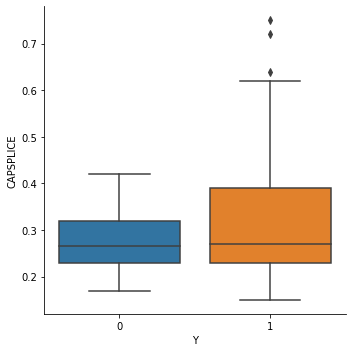

In [15]:
warnings.filterwarnings('ignore')
orders = [0, 1]
g = sns.factorplot(y="RFV",x="Y",data=data,kind="box", order = orders)
g = sns.factorplot(y="H2RFV",x="Y", data=data,kind="box", order = orders)
g = sns.factorplot(y="CONICITY",x="Y",data=data,kind="box", order = orders)
g = sns.factorplot(y="PLY",x="Y", data=data,kind="box", order = orders)
g = sns.factorplot(y="LFV",x="Y", data=data,kind="box", order = orders)
g = sns.factorplot(y="RRO",x="Y", data=data,kind="box", order = orders)
g = sns.factorplot(y="CAPSPLICE",x="Y", data=data,kind="box", order = orders)

Correlations

In [20]:
X_train

,RFV,H2RFV,CONICITY,PLY,LFV,RRO,CAPSPLICE
0,46,23,4.5,56.0,13.0,0.77,0.17
1,35,6,6.4,52.8,16.7,0.60,0.26
2,34,2,8.0,49.5,11.5,0.50,0.33
3,39,22,9.4,52.3,9.3,0.51,0.28
4,55,35,12.1,51.3,14.7,0.79,0.20
...,...,...,...,...,...,...,...
76,34,11,5.7,40.4,9.4,0.68,0.32
77,55,34,7.3,45.8,16.7,0.86,0.20
78,55,10,9.5,51.8,9.2,0.81,0.42
79,52,25,6.9,52.1,10.4,0.70,0.18


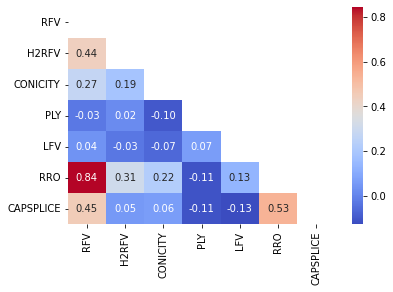

In [16]:
corrmat = np.triu(X_train.corr(method='pearson'))

data_cor = X_train.copy()

g = sns.heatmap(data_cor.corr(method='pearson'),cmap="coolwarm",annot=True, mask = corrmat, fmt=".2f")

In [17]:
data_cor.corr(method='pearson')

,RFV,H2RFV,CONICITY,PLY,LFV,RRO,CAPSPLICE
RFV,1.000000,0.436974,0.273539,-0.026422,0.036681,0.844144,0.451586
H2RFV,0.436974,1.000000,0.187352,0.020179,-0.030466,0.305579,0.053039
CONICITY,0.273539,0.187352,1.000000,-0.100166,-0.065154,0.224127,0.064838
PLY,-0.026422,0.020179,-0.100166,1.000000,0.065895,-0.110598,-0.108576
LFV,0.036681,-0.030466,-0.065154,0.065895,1.000000,0.131971,-0.127157
RRO,0.844144,0.305579,0.224127,-0.110598,0.131971,1.000000,0.534016
CAPSPLICE,0.451586,0.053039,0.064838,-0.108576,-0.127157,0.534016,1.000000


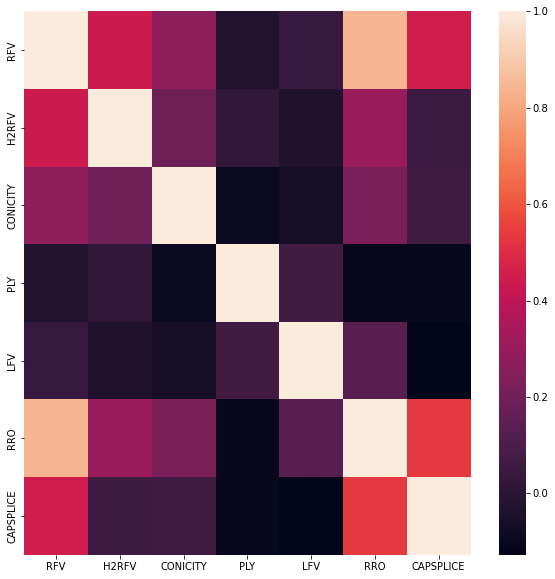

In [18]:
top_num_features = data_cor.columns.to_list()
corrmat = data[top_num_features].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corrmat);

### Mutual information

In [19]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

In [20]:
selector = SelectKBest(mutual_info_classif, k=7)
X_reduced = selector.fit_transform(X_train, y_train)
X_reduced.shape
cols = selector.get_support(indices=True)
selected_columns = X_train.iloc[:,cols].columns.tolist()
selected_columns

['RFV', 'H2RFV', 'CONICITY', 'PLY', 'LFV', 'RRO', 'CAPSPLICE']

In [21]:
threshold = 10  # the number of most relevant features
high_score_features = []
feature_scores = mutual_info_classif(X_train, y_train, random_state=0)
for score, f_name in sorted(zip(feature_scores, X_train.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
df_wine_norm_mic = X_train[high_score_features]
print(df_wine_norm_mic.columns)

CONICITY 0.25136458331699285
RFV 0.206417755554261
RRO 0.17028071519608767
H2RFV 0.10961494064142419
LFV 0.0012659850702467779
PLY 0.0
CAPSPLICE 0.0
Index(['CONICITY', 'RFV', 'RRO', 'H2RFV', 'LFV', 'PLY', 'CAPSPLICE'], dtype='object')


In [22]:
def Scatterplot(data, var1, var2, cat):

    fig = px.scatter(data, x = var1, y = var2, color =cat, width = 800)
    fig.update_traces(marker=dict(size = 12,line = dict(width = 1)),selector=dict(mode = 'markers'))
    fig.update_layout(title = 'Scatterplot: ' + var1 + " vs " + var2)
    fig.update_xaxes(title = var1)
    fig.update_yaxes(title = var2)
    fig.show()

In [29]:
Scatterplot(data, "RFV", "RRO",  "Y")

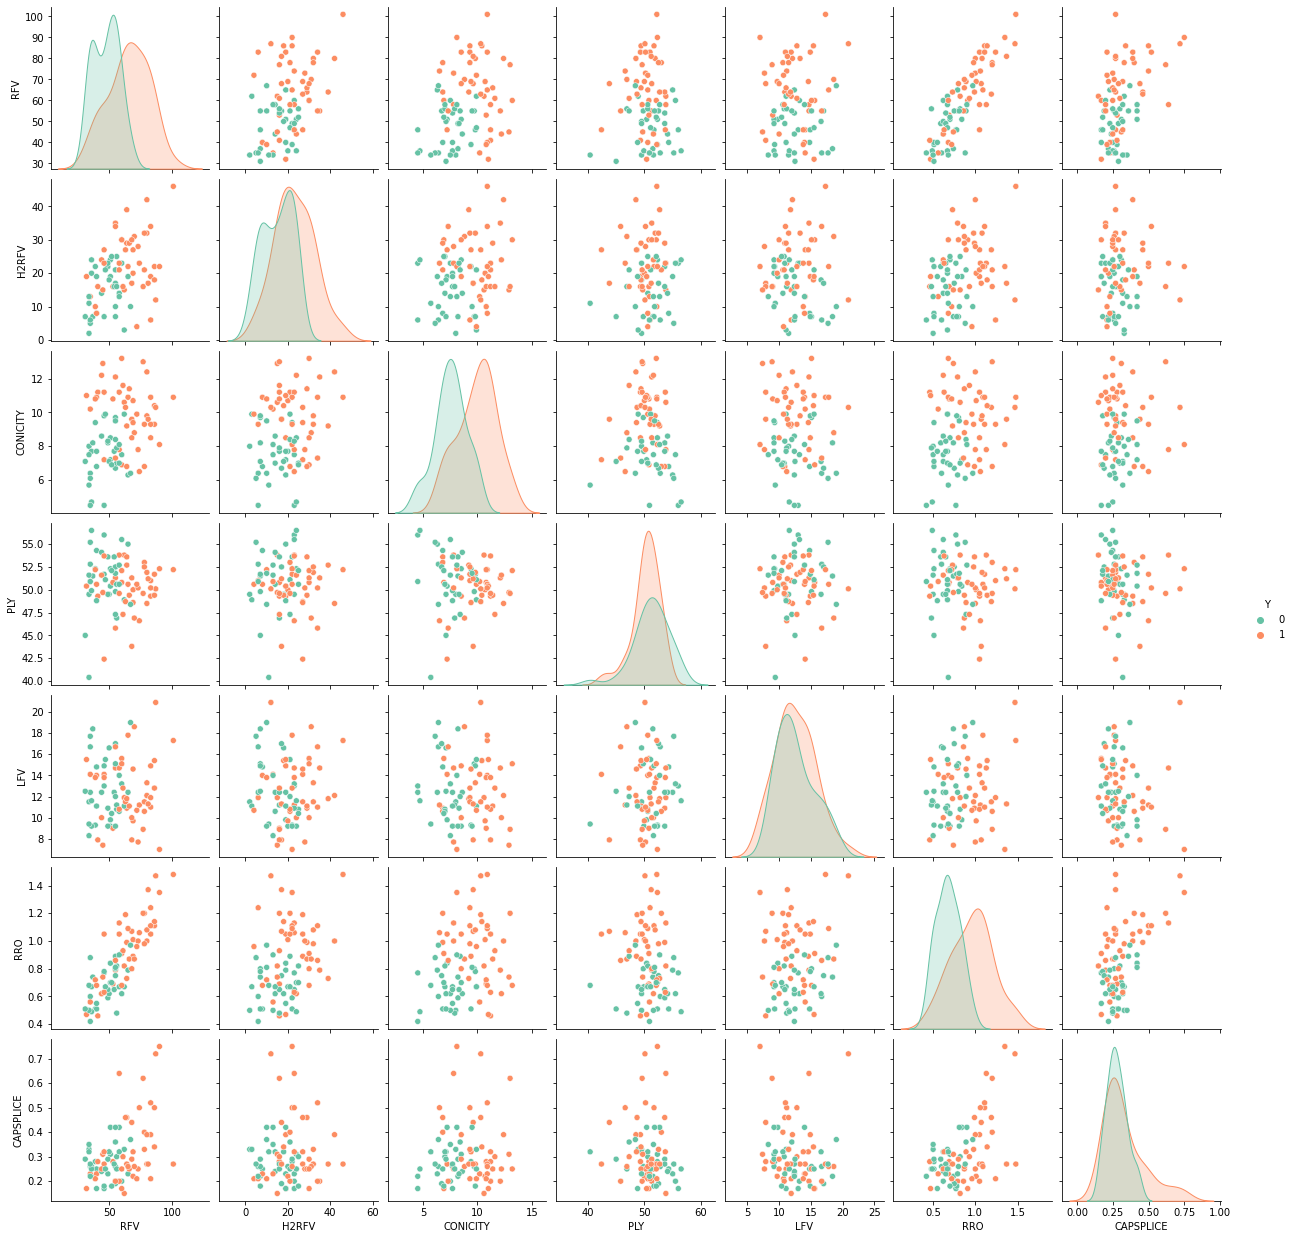

In [11]:
g = sns.pairplot(data, hue="Y", palette="Set2", diag_kind="kde", height=2.5)

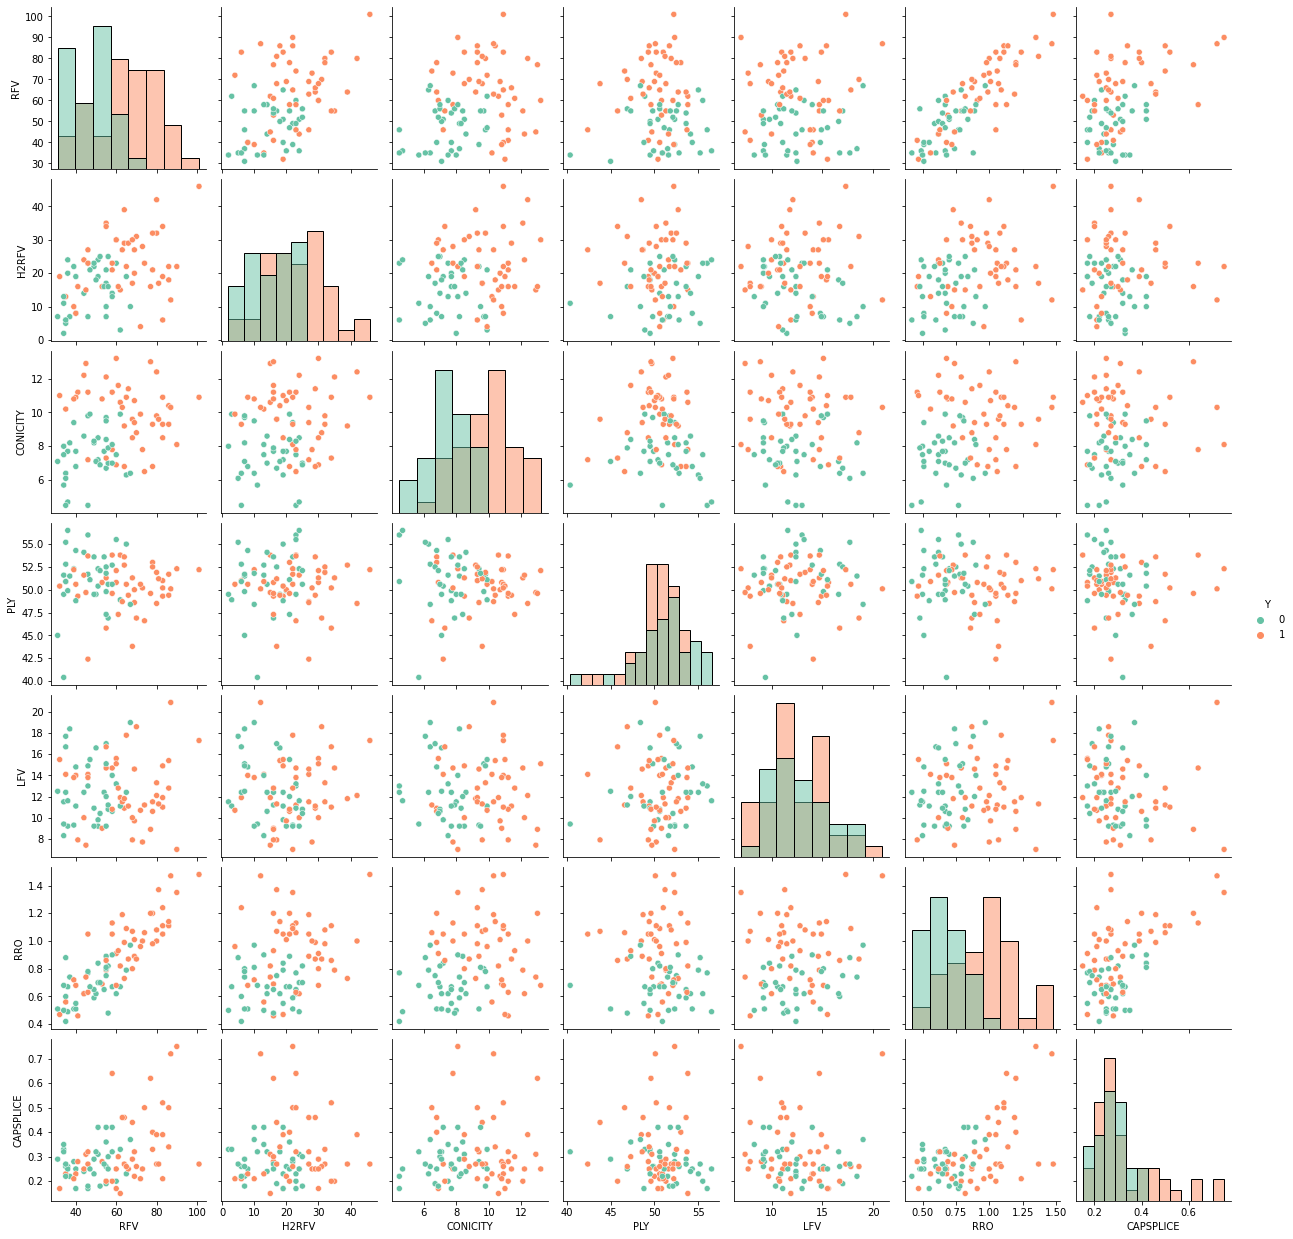

In [13]:
g = sns.pairplot(data, hue="Y", palette="Set2", diag_kind="hist")

In [8]:
fig = px.scatter_3d(data, x="H2RFV", y="CONICITY",z="RRO",
                    color= "Y")

fig.show()

In [9]:
fig = px.scatter_3d(data, x="H2RFV", y="CONICITY",z="RFV",
                    color= "Y")

fig.show()